<a href="https://colab.research.google.com/github/minimelonling/2022_spring_machine_learning/blob/main/hw1/Lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# check concurrent folder location
# import os
# os.chdir('/content/drive/My Drive/Colab Notebooks/intro_to_ml_2022/hw1')

# Start building simple model with Pytorch

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

## Data Loader


In [ ]:
transform = transforms.Compose([transforms.ToTensor(),])##

# /content/drive/MyDrive/Colab Notebooks/data/MNIST/MNIST/raw/train-images-idx3-ubyte.gz
#MNIST 手寫數字辨識集
trainset = torchvision.datasets.MNIST(root='/content/drive/MyDrive/Colab Notebooks/data/MNIST', train=True,download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=32,shuffle=True, num_workers=2)

testset = torchvision.datasets.MNIST(root='/content/drive/MyDrive/Colab Notebooks/data/MNIST', train=False,download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,shuffle=True, num_workers=2)

classes = ('0', '1', '2', '3',
           '4', '5', '6', '7', '8', '9')

## Visualize Images

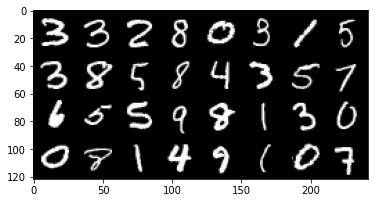

    3     3     2     8     0     3     1     5     3     8     5     8     4     3     5     7     6     5     5     9     8     1     3     0     0     8     1     4     9     1     0     7


In [ ]:
def imshow(img):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    #（channels,imagesize,imagesize）=>（imagesize,imagesize,channels）
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()
# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(32)))

## Build Example Model

In [ ]:
import torch.nn as nn
import torch.nn.functional as F

In [ ]:
# calculating hidden layer neurons
# X(neurons): 2, 4, 8, 16, 64, 128, 1024
# N(layers): 1, 2, 4, 8, 16

X = [2, 4, 8, 16, 64, 128, 1024]
N = [1, 2, 4, 8, 16]

hidden_neuron_num = []
for i in range(0, len(N)):
  hidden_neuron_num.append(np.zeros((len(X), N[i])))
  for j in range(0, len(X)):
    x_3 = 3 * X[j]
    x_1 = X[j]
    for k in range(0, N[i]):
      if N[i] == 1:
        hidden_neuron_num[i][j][k] = X[j]
      else:
        hidden_neuron_num[i][j][k] = (x_3 * k + x_1 * (N[i] - 1 - k)) / (N[i] - 1)
  hidden_neuron_num[i] = np.round_(hidden_neuron_num[i]).astype(int)

print(hidden_neuron_num)


[array([[   2],
       [   4],
       [   8],
       [  16],
       [  64],
       [ 128],
       [1024]]), array([[   2,    6],
       [   4,   12],
       [   8,   24],
       [  16,   48],
       [  64,  192],
       [ 128,  384],
       [1024, 3072]]), array([[   2,    3,    5,    6],
       [   4,    7,    9,   12],
       [   8,   13,   19,   24],
       [  16,   27,   37,   48],
       [  64,  107,  149,  192],
       [ 128,  213,  299,  384],
       [1024, 1707, 2389, 3072]]), array([[   2,    3,    3,    4,    4,    5,    5,    6],
       [   4,    5,    6,    7,    9,   10,   11,   12],
       [   8,   10,   13,   15,   17,   19,   22,   24],
       [  16,   21,   25,   30,   34,   39,   43,   48],
       [  64,   82,  101,  119,  137,  155,  174,  192],
       [ 128,  165,  201,  238,  274,  311,  347,  384],
       [1024, 1317, 1609, 1902, 2194, 2487, 2779, 3072]]), array([[   2,    2,    3,    3,    3,    3,    4,    4,    4,    4,    5,
           5,    5,    5,    6,    

In [ ]:
## This is an simple example of model building by init parameters and adding layer.

class Net_S(nn.Module):
    def __init__(self, n, x, ni, xi, hnn):
        super(Net_S, self).__init__()
        torch.manual_seed(277)
        np.random.seed(277)
        # Initialize object variables
        self.layer = n
        self.neurons = x

        # build sequential model

        # self.hid = torch.nn.Sequential()
        # self.hid.add_module('Lin'+str(1), torch.nn.Linear(28*28, 128)) # appends a Linear layer to hidden 
        # self.hid.add_module("Lin2", torch.nn.Linear(128, 64)) 
        # self.hid.add_module("Lin3", torch.nn.Linear(64 , 10))

        self.hid = self.build_seq_model(torch.nn.Sequential(), ni, xi, hnn)

        # call class function
        self._print_layers()

    def build_seq_model(self, seq, ni, xi, hnn):
      length = len(hnn[ni][xi])
      Lin = 1
      seq.add_module("Lin%d" % (Lin), torch.nn.Linear(28*28, hnn[ni][xi][0]))
      Lin += 1
      if length > 1:
        for i in range(0, length - 1):
          seq.add_module("Lin%d" % (Lin), torch.nn.Linear(hnn[ni][xi][i], hnn[ni][xi][i + 1]))
          Lin += 1
      seq.add_module("Lin%d" % (Lin), torch.nn.Linear(hnn[ni][xi][length - 1], 10))
      Lin += 1
      return seq

    def _print_layers(self):
        print("number of layer: {}  number of neurons: {}".format(self.layer, self.neurons))

    def forward(self, x):
        x = x.view(-1, 28*28)
        x = self.hid(x)

        return x


In [ ]:
# building neuron networks

neural_networks = []
for i in range(0, len(N)):
  nn_list = []
  for j in range(0, len(X)):
    nn_list.append(Net_S(N[i], X[j], i, j, hidden_neuron_num))
  neural_networks.append(nn_list)

print(neural_networks[0][0])

number of layer: 1  number of neurons: 2
number of layer: 1  number of neurons: 4
number of layer: 1  number of neurons: 8
number of layer: 1  number of neurons: 16
number of layer: 1  number of neurons: 64
number of layer: 1  number of neurons: 128
number of layer: 1  number of neurons: 1024
number of layer: 2  number of neurons: 2
number of layer: 2  number of neurons: 4
number of layer: 2  number of neurons: 8
number of layer: 2  number of neurons: 16
number of layer: 2  number of neurons: 64
number of layer: 2  number of neurons: 128
number of layer: 2  number of neurons: 1024
number of layer: 4  number of neurons: 2
number of layer: 4  number of neurons: 4
number of layer: 4  number of neurons: 8
number of layer: 4  number of neurons: 16
number of layer: 4  number of neurons: 64
number of layer: 4  number of neurons: 128
number of layer: 4  number of neurons: 1024
number of layer: 8  number of neurons: 2
number of layer: 8  number of neurons: 4
number of layer: 8  number of neuron

## Hyper parameters settings

In [ ]:
##############################################
# Remember change net to your 'class Net name'!
##############################################

import torch.optim as optim
epochs = [2, 4, 8, 16]

# Train, test and calculating accuracy

In [ ]:
# merging training and testing

class model():
  def __init__(self, ep, net, trainl, testl):
    self.epoch = ep
    self.criterion = nn.CrossEntropyLoss()
    self.optimizer = optim.Adam(net.parameters(), lr = 0.001)
    self.device = 'cuda:0' if torch.cuda.is_available() else 'cpu'
    self.net = net.to(self.device)
    self.trainloader = trainl
    self.testloader = testl

# Training model

  def train(self, x, n_row):

    self.net.train()
    for epoch in tqdm(range(self.epoch)):# loop over the dataset multiple times

        running_loss = 0.0
        for i, data in enumerate(self.trainloader, 0):
            # get the inputs; data is a list of [inputs, labels]
            inputs, labels = data
            inputs, labels = inputs.to(self.device), labels.to(self.device)
            # print(inputs.shape)
            # zero the parameter gradients
            self.optimizer.zero_grad()

            # forward + backward + optimize
            outputs = self.net(inputs)
            loss = self.criterion(outputs, labels)
            loss.backward()
            self.optimizer.step()

            # print statistics
            running_loss += loss.item()
            if i % 1000 == 999:    # print every 1000 mini-batches 
                print('[%d, %5d] loss: %.6f' %
                      (self.epoch + 1, i + 1, running_loss / 999))
                n_row[x + 1] = str(running_loss / 999)
                running_loss = 0.0

    print('Finished Training')

# testing model

  def test(self):
    correct = 0
    total = 0
    with torch.no_grad():
        for data in self.testloader:
            images, labels = data[0].to(self.device), data[1].to(self.device)
            outputs = self.net(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    print('network info: n = %d, x = %d, epoch = %d\n' % (self.net.layer, self.net.neurons, self.epoch))
    print('Accuracy of the network on the 10000 test images: %f %%\n\n\n' % (
        100 * correct / total))

# calculating accuracy

  def calculate_acc(self, x, n_row):
    correct = 0
    total = 0
    with torch.no_grad():
        for data in self.testloader:
            images, labels = data[0].to(self.device), data[1].to(self.device)
            outputs = self.net(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    print('Accuracy of the network on the 10000 test images: %d %%' % (
        100 * correct / total))

    n_row[x + 11] = str(100 * correct / total) + '%'

# train, test, and output accuracy

import csv
len_X = len(X)
len_N = len(N)

with open('/content/drive/My Drive/Colab Notebooks/output2.csv', 'w', newline = '') as csvfile:
  writer = csv.writer(csvfile)
  title = ['Loss', '', '', '', '', '', '', '', '', '', 'Accuracy', '', '', '', '', '', '', '']
  epoch_title = [['epoch = 2', '', '', '', '', '', '', '', '', '', 'epoch = 2', '', '', '', '', '', '', ''],
          ['epoch = 4', '', '', '', '', '', '', '', '', '', 'epoch = 4', '', '', '', '', '', '', ''],
          ['epoch = 8', '', '', '', '', '', '', '', '', '', 'epoch = 8', '', '', '', '', '', '', ''],
          ['epoch = 16', '', '', '', '', '', '', '', '', '', 'epoch = 16', '', '', '', '', '', '', '']]
  writer.writerow(title)
  # here I separate epoch 2, 4, 8, 16 to 4 files
  # change the range to (0, 1), (1, 2), (2, 3), (3, 4) to run it, to avoid long training time
  for e in range(0, len(epochs)):
    writer.writerow(epoch_title[e])
    writer.writerow(['', '2', '4', '8', '16', '64', '128', '1024', '', '', '', '2', '4', '8', '16', '64', '128', '1024'])
    for n in range(0, len_N):
      n_row = [str(N[n]), '', '', '', '', '', '', '', '', '', str(N[n]), '', '', '', '', '', '', '']
      for x in range(0, len_X):
        print("n = %d, x = %d, e = %d\n" % (N[n], X[x], epochs[e]))
        m = model(epochs[e], neural_networks[n][x], trainloader, testloader)
        m.train(x, n_row)
        m.test()
        m.calculate_acc(x, n_row)
      writer.writerow(n_row)


In [ ]:
"""
import matplotlib.pyplot as plt

cell_text = np.zeros((5, 7))
row_headers = X
col_headers = N
rcolors = plt.cm.BuPu(np.full(len(row_headers), 0.1))
ccolors = plt.cm.BuPu(np.full(len(col_headers), 0.1))

the_table = plt.table(cellText = cell_text,
            rowLabels = row_headers,
            rowColours = rcolors,
            rowLoc = 'right',
            colColours = ccolors,
            colLabels = col_headers,
            loc = 'center')
"""


# Reference

### google drive folder location
https://ithelp.ithome.com.tw/articles/10234373
### write .csv
https://blog.gtwang.org/programming/python-csv-file-reading-and-writing-tutorial/
### print table
https://www.pythonpool.com/matplotlib-table/


